In [2]:
# Creating a table for labels and their descriptions
labels_description = {
    "Variable": ["SL", "TSR", "RSB", "PR", "CH", "ISIH", "ALL", "HN", "M"],
    "Description": [
        "Awareness of speed limits",
        "Traffic signals recognized",
        "Awareness of the importance of rear seat belts",
        "Acknowledgment of the rules for pillion riders",
        "Color of the helmet",
        "Awareness about ISI-marked helmets",
        "Opinion on whether the age for obtaining a driving license should be lowered",
        "Awareness of the helpline number for road safety",
        "Admits to using a mobile phone while driving"
    ]
}

# Convert dictionary to DataFrame
labels_df = pd.DataFrame(labels_description)

labels_df


,Variable,Description
0,SL,Awareness of speed limits
1,TSR,Traffic signals recognized
2,RSB,Awareness of the importance of rear seat belts
3,PR,Acknowledgment of the rules for pillion riders
4,CH,Color of the helmet
5,ISIH,Awareness about ISI-marked helmets
6,ALL,Opinion on whether the age for obtaining a dri...
7,HN,Awareness of the helpline number for road safety
8,M,Admits to using a mobile phone while driving


In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/DATA COLLECTION OF ICSSR GROUP 4.xlsx'
data_new = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data_new.head()


,Sr.,SL,TSR,RSB,PR,CH,ISIH,ALL,HN,M
0,1,YES,4,NO,NO,BLACK,YES,NO,NO,YES
1,2,YES,4,NO,NO,BLACK,YES,NO,NO,YES
2,3,NO,3,NO,NO,BLACK,YES,NO,NO,YES
3,4,YES,4,NO,YES,BLACK,YES,NO,NO,NO
4,5,NO,3,NO,NO,BLACK,NO,YES,NO,YES


In [3]:
# Dropping specified columns
data_dropped = data_new.drop(columns=['Sr.', 'CH', 'RSB'])

# Performing one-hot encoding for the 'TSR' column
data_encoded = pd.get_dummies(data_dropped, columns=['TSR'], prefix='TSR')

# Converting specified columns to binary values
binary_columns = ['SL', 'PR', 'ISIH', 'ALL', 'HN', 'M']
data_encoded[binary_columns] = data_encoded[binary_columns].replace({'YES': 1, 'NO': 0})

# Display the transformed dataframe to verify the changes
data_encoded.head()


,SL,PR,ISIH,ALL,HN,M,TSR_0,TSR_2,TSR_3,TSR_4
0,1,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0
3,1,1,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,1,0


In [4]:
# Generating a correlation matrix for the transformed data
correlation_matrix = data_encoded.corr()

# Display the correlation matrix
correlation_matrix


,SL,PR,ISIH,ALL,HN,M,TSR_0,TSR_2,TSR_3,TSR_4
SL,1.000000,0.523518,0.158645,-0.125881,-0.181334,0.182537,-0.181334,0.318791,-0.577733,0.465241
PR,0.523518,1.000000,0.238887,-0.252225,-0.064209,-0.318073,-0.064209,0.321504,-0.207729,0.015248
ISIH,0.158645,0.238887,1.000000,-0.299392,-0.352001,-0.267044,-0.352001,0.046237,-0.099960,0.247772
ALL,-0.125881,-0.252225,-0.299392,1.000000,-0.054290,0.206456,0.115366,0.339062,-0.171384,-0.125881
HN,-0.181334,-0.064209,-0.352001,-0.054290,1.000000,-0.094397,0.290780,-0.101936,0.104763,-0.181334
M,0.182537,-0.318073,-0.267044,0.206456,-0.094397,1.000000,-0.094397,0.156904,0.244177,-0.324510
TSR_0,-0.181334,-0.064209,-0.352001,0.115366,0.290780,-0.094397,1.000000,-0.101936,-0.233181,-0.181334
TSR_2,0.318791,0.321504,0.046237,0.339062,-0.101936,0.156904,-0.101936,1.000000,-0.372389,-0.289589
TSR_3,-0.577733,-0.207729,-0.099960,-0.171384,0.104763,0.244177,-0.233181,-0.372389,1.000000,-0.662445
TSR_4,0.465241,0.015248,0.247772,-0.125881,-0.181334,-0.324510,-0.181334,-0.289589,-0.662445,1.000000


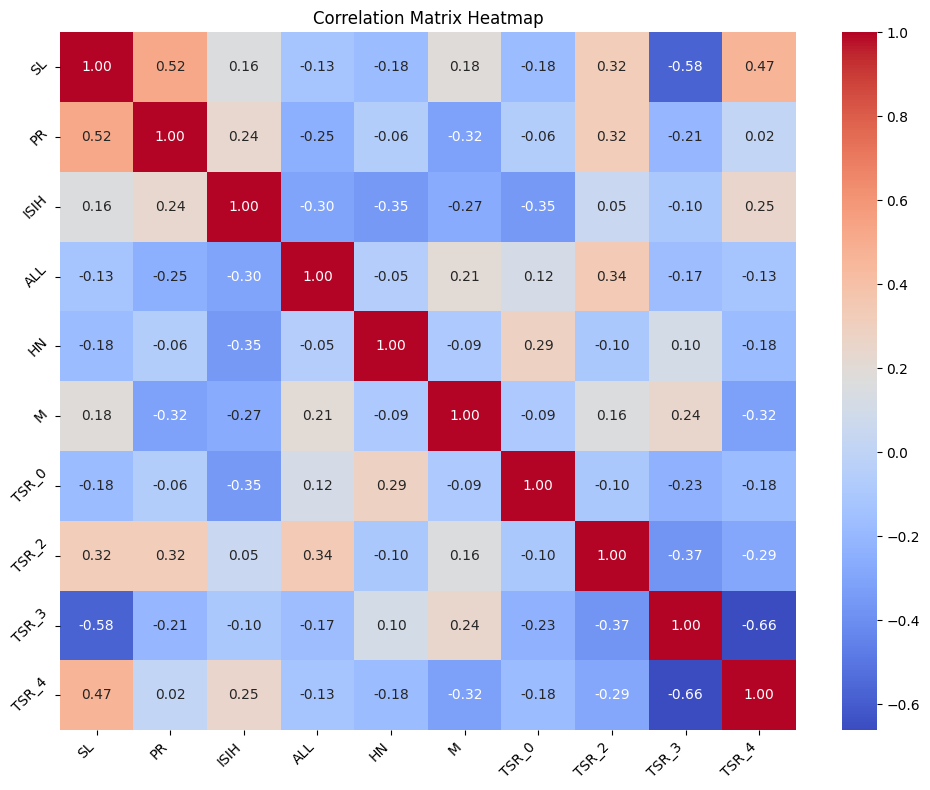

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the figure size for better readability
plt.figure(figsize=(10, 8))

# Generating a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Setting titles and labels for clarity
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

# Displaying the heatmap
plt.tight_layout()
plt.show()


In [ ]:
# Calculate descriptive statistics for 'PR' and 'SL'
descriptive_stats = data_encoded[['PR', 'SL']].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the descriptive statistics
descriptive_stats


,PR,SL
mean,0.460000,0.340000
median,0.000000,0.000000
std,0.503457,0.478518
min,0.000000,0.000000
max,1.000000,1.000000


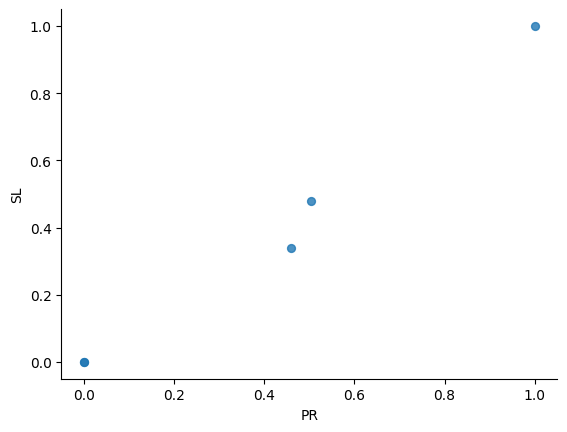

In [ ]:
# @title PR vs SL

from matplotlib import pyplot as plt
descriptive_stats.plot(kind='scatter', x='PR', y='SL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

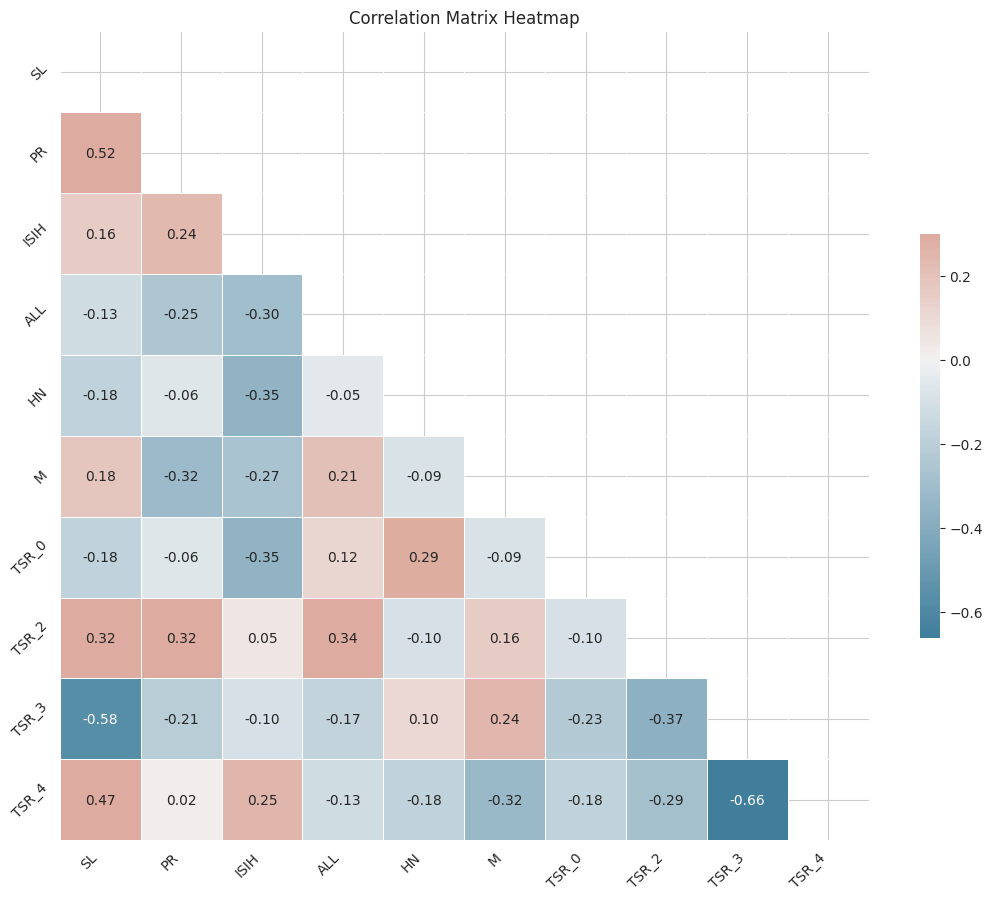

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the 'whitegrid' style for a clean background with grid lines
sns.set_style('whitegrid')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and adjust the ticks
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

# Display the heatmap
plt.tight_layout()
plt.show()


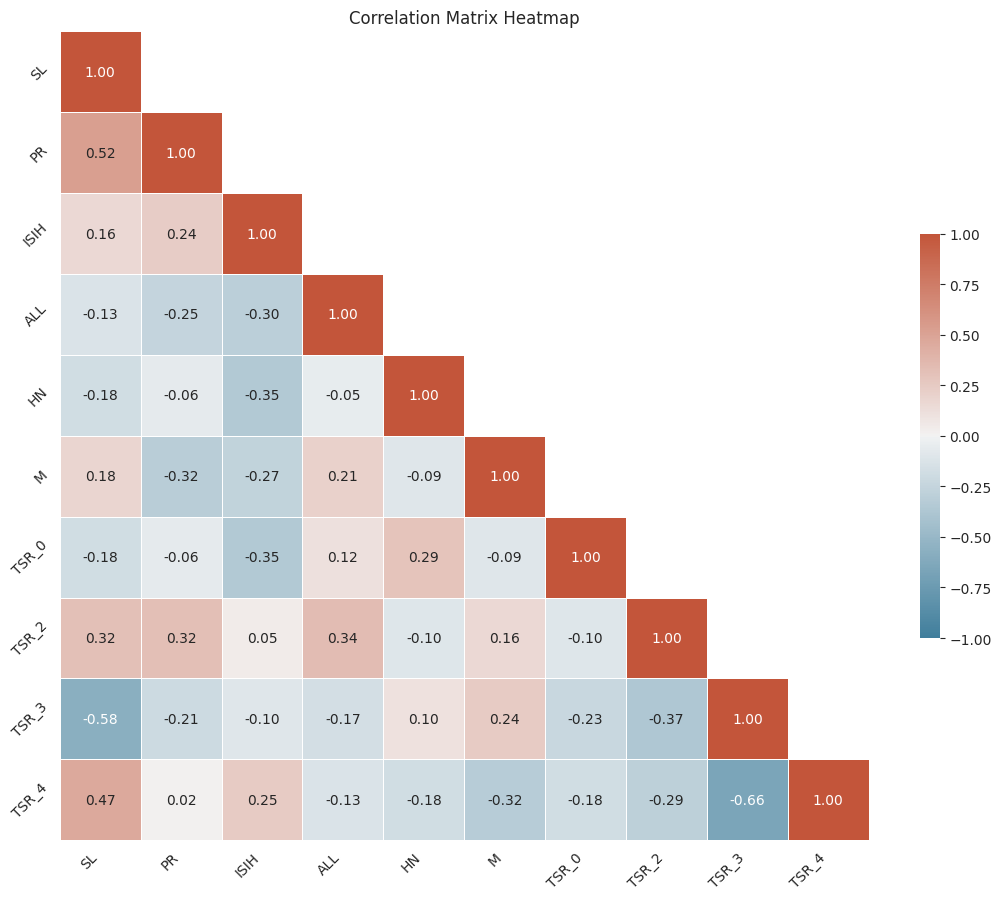

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `correlation_matrix` is your correlation matrix.
# Fill the diagonal with ones
np.fill_diagonal(correlation_matrix.values, 1)

# Generate a mask for the upper triangle only
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # 'k=1' excludes the diagonal

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask for the upper triangle
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title
plt.title('Correlation Matrix Heatmap')

# Adjust the ticks
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

# Display the heatmap
plt.tight_layout()
plt.show()


In [ ]:


# Drop the "Sr." column from the dataset
nf = data_new.drop(columns=['Sr.','CH','RSB'])

nf.head()


,SL,TSR,PR,ISIH,ALL,HN,M
0,1,4,0,1,0,0,1
1,1,4,0,1,0,0,1
2,0,3,0,1,0,0,1
3,1,4,1,1,0,0,0
4,0,3,0,0,1,0,1


In [6]:
# Count the occurrences of each value in the "TSR" column within the scale of 0 to 4
tsr_counts = data_new['TSR'].value_counts().reindex(range(0, 5), fill_value=0)

tsr_counts


0     3
1     0
2     7
3    23
4    17
Name: TSR, dtype: int64

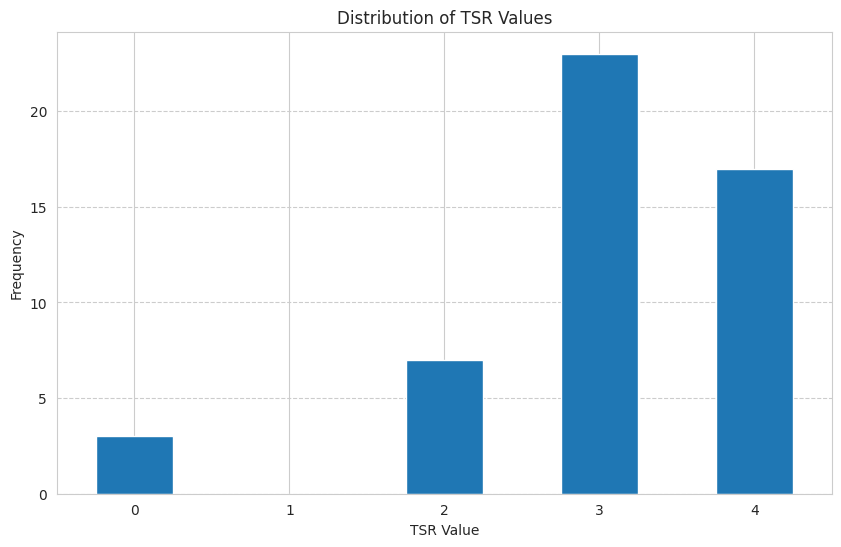

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot for the TSR counts
plt.figure(figsize=(10, 6))
tsr_counts.plot(kind='bar')
plt.title('Distribution of TSR Values')
plt.xlabel('TSR Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()


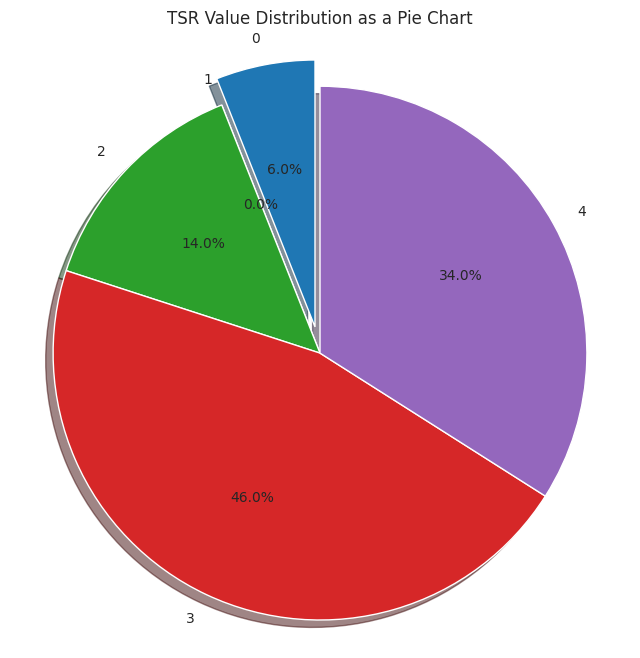

In [ ]:
import numpy as np

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = tsr_counts.index
sizes = tsr_counts.values
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e., '0')

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('TSR Value Distribution as a Pie Chart')
plt.show()


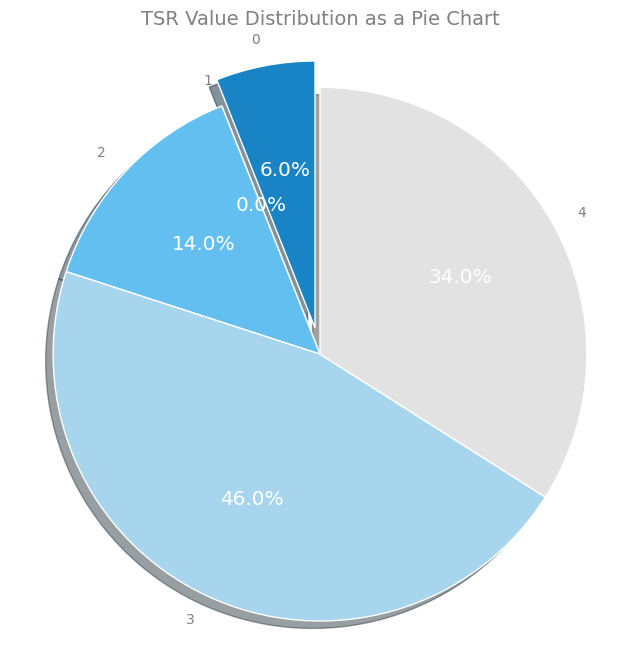

In [7]:
# Re-define the color palette as the previous one
colors_pie = ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]

# We have only five TSR categories, so we take five colors from the palette
colors_for_tsr_pie = colors_pie[:5]

# Re-define the labels and sizes for the pie chart
labels = tsr_counts.index
sizes = tsr_counts.values
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e., '0')

# Creating the pie chart with the defined color palette
fig1, ax1 = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=True, startangle=90, colors=colors_for_tsr_pie)

# Beautify the pie chart with better aesthetics
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size('x-large')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('TSR Value Distribution as a Pie Chart', color='grey', fontsize=14)
plt.show()


In [8]:
# Calculating value counts for other categorical/binary columns that might impact the study
# Columns considered: SL, PR, ISIH, ALL, HN, M
columns_to_count = ['SL', 'PR', 'ISIH', 'ALL', 'HN', 'M']

# Initialize a dictionary to hold value counts for each column
value_counts_dict = {}

for column in columns_to_count:
    value_counts_dict[column] = data_new[column].value_counts()

# Convert dictionary to DataFrame for easier display
value_counts_df = pd.DataFrame(value_counts_dict)

value_counts_df


,SL,PR,ISIH,ALL,HN,M
NO,33,27,17,28,47,24
YES,17,23,33,22,3,26


In [9]:
# For calculating the overall score by adding all rows for the specified variables and then finding the average,
# we need to first convert the categorical/binary variables back to numerical where necessary, as some were previously transformed.

# The variables "CH" and "RSB" were dropped earlier, so we will exclude them from this calculation.
# Variables to include in score calculation: SL, TSR, PR, ISIH, ALL, HN, M
# Note: TSR needs to be handled differently as it was one-hot encoded. We'll revert its encoding to calculate the overall score.

# Revert one-hot encoding for TSR by assigning the recognized signals count
data_encoded['TSR'] = data_encoded[['TSR_0', 'TSR_2', 'TSR_3', 'TSR_4']].idxmax(axis=1).str[-1].astype(int)

# Calculate the overall score for each row by summing up the values of the included variables
data_encoded['Overall_Score'] = data_encoded[['SL', 'PR', 'ISIH', 'ALL', 'HN', 'M', 'TSR']].sum(axis=1)

# Calculate the average overall score
average_overall_score = data_encoded['Overall_Score'].mean()

average_overall_score


5.5

In [10]:
# For the addition operation involving road knowledge, we need to calculate the sum of the specified variables for rows 2 to 51.
# Since "CH" and "RSB" were dropped and TSR was transformed, we need to adjust the calculation accordingly.

# Adjusting the calculation to include the reverted TSR values and excluding "CH" and "RSB".
# Additionally, we'll calculate this for the original dataset 'data_new' as it includes "CH" and "RSB", converting necessary columns.

# Convert binary columns in 'data_new' to numerical values for calculation
data_new_binary_converted = data_new.copy()
binary_columns = ['SL', 'RSB', 'PR', 'ISIH', 'ALL', 'HN', 'M']
data_new_binary_converted[binary_columns] = data_new_binary_converted[binary_columns].replace({'YES': 1, 'NO': 0})

# Since "CH" does not contribute numerically to the score, we exclude it from the sum.
# Calculate "Road Knowledge" as the sum of the specified variables for rows 2 to 51 (index 1 to 50 in Python)
data_new_binary_converted['Road_Knowledge'] = data_new_binary_converted.loc[1:50, ['SL', 'TSR', 'RSB', 'PR', 'ISIH', 'ALL', 'HN', 'M']].sum(axis=1)

# Display the "Road Knowledge" scores for rows 2 to 51
road_knowledge_scores = data_new_binary_converted.loc[1:50, 'Road_Knowledge']

road_knowledge_scores


1     7.0
2     5.0
3     7.0
4     5.0
5     5.0
6     6.0
7     7.0
8     1.0
9     5.0
10    2.0
11    6.0
12    6.0
13    7.0
14    7.0
15    5.0
16    4.0
17    2.0
18    7.0
19    2.0
20    4.0
21    5.0
22    7.0
23    5.0
24    5.0
25    6.0
26    7.0
27    5.0
28    7.0
29    5.0
30    5.0
31    6.0
32    7.0
33    5.0
34    7.0
35    5.0
36    5.0
37    6.0
38    7.0
39    5.0
40    7.0
41    5.0
42    5.0
43    6.0
44    7.0
45    5.0
46    7.0
47    5.0
48    5.0
49    6.0
Name: Road_Knowledge, dtype: float64

In [11]:
# Adding the values of SL, TSR, RSB, PR, and ISIH to calculate 'aware_road_rule_reg' for each respondent
# Adjusting the calculation to include the original values of TSR and converting necessary columns to numerical values

# Convert binary columns to numerical values for calculation
data_new_adjusted = data_new.copy()
binary_columns_adjusted = ['SL', 'RSB', 'PR', 'ISIH']
data_new_adjusted[binary_columns_adjusted] = data_new_adjusted[binary_columns_adjusted].replace({'YES': 1, 'NO': 0})

# Calculate 'aware_road_rule_reg' as the sum of the specified variables
data_new_adjusted['aware_road_rule_reg'] = data_new_adjusted[['SL', 'TSR', 'RSB', 'PR', 'ISIH']].sum(axis=1)

# Saving the result in a variable
aware_road_rule_reg = data_new_adjusted['aware_road_rule_reg']

aware_road_rule_reg


0     6
1     6
2     4
3     7
4     3
5     5
6     5
7     5
8     0
9     5
10    1
11    5
12    3
13    6
14    6
15    4
16    3
17    2
18    5
19    0
20    3
21    4
22    7
23    3
24    5
25    5
26    5
27    4
28    7
29    3
30    5
31    5
32    5
33    4
34    7
35    3
36    5
37    5
38    5
39    4
40    7
41    3
42    5
43    5
44    5
45    4
46    7
47    3
48    5
49    5
Name: aware_road_rule_reg, dtype: int64

count    50.000000
mean      4.480000
std       1.644285
min       0.000000
25%       3.250000
50%       5.000000
75%       5.000000
max       7.000000
Name: aware_road_rule_reg, dtype: float64


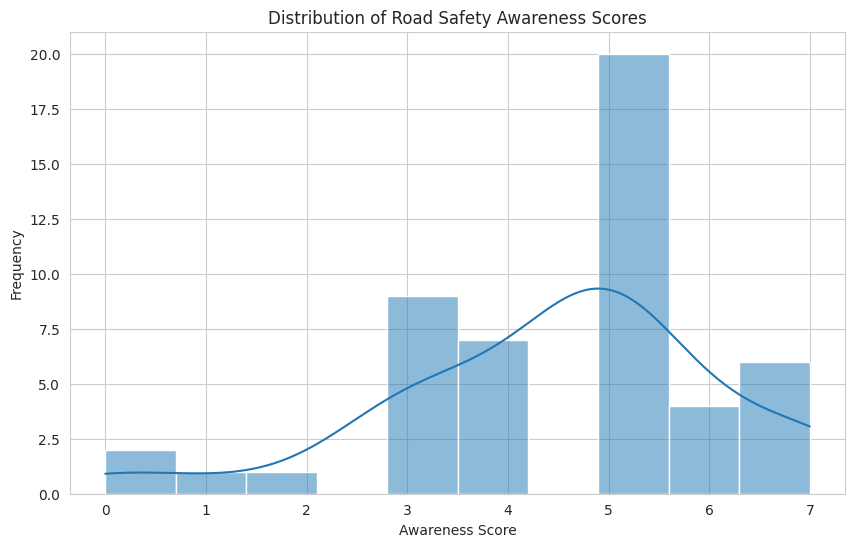

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `aware_road_rule_reg` is a column in `data_new_adjusted` DataFrame

# Descriptive Statistics
print(data_new_adjusted['aware_road_rule_reg'].describe())

# Histogram of awareness scores
plt.figure(figsize=(10, 6))
sns.histplot(data_new_adjusted['aware_road_rule_reg'], kde=True, bins=10)
plt.title('Distribution of Road Safety Awareness Scores')
plt.xlabel('Awareness Score')
plt.ylabel('Frequency')
plt.show()


count    50.000000
mean      4.480000
std       1.644285
min       0.000000
25%       3.250000
50%       5.000000
75%       5.000000
max       7.000000
Name: aware_road_rule_reg, dtype: float64


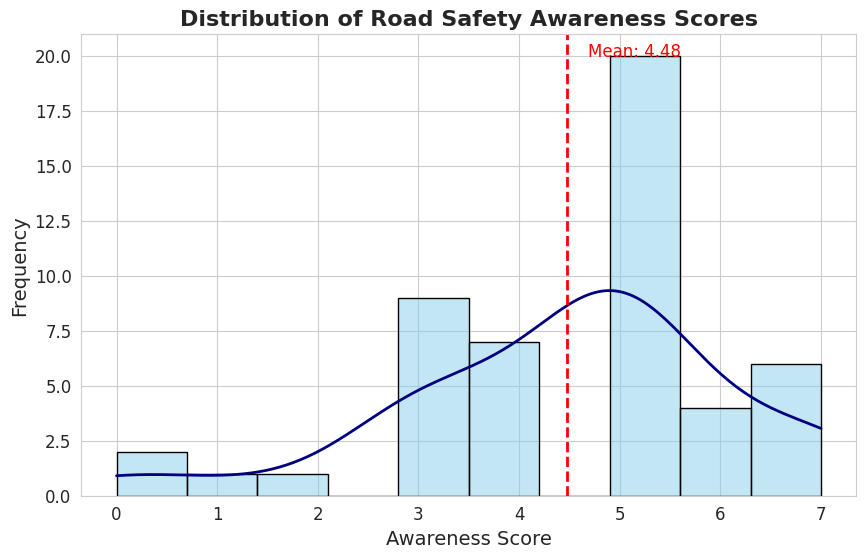

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up seaborn style for better aesthetics
sns.set_style("whitegrid")  # Sets a background grid for easier reading

# Assuming `aware_road_rule_reg` is a column in `data_new_adjusted` DataFrame

# Descriptive Statistics
print(data_new_adjusted['aware_road_rule_reg'].describe())

# Histogram of awareness scores
plt.figure(figsize=(10, 6))
# Generate the histogram with Kernel Density Estimate (KDE) for a smoother distribution curve
ax = sns.histplot(data_new_adjusted['aware_road_rule_reg'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Adding enhancements
ax.set_title('Distribution of Road Safety Awareness Scores', fontsize=16, fontweight='bold')  # Title with increased font size and bolded
ax.set_xlabel('Awareness Score', fontsize=14)  # Larger font size for the X-axis label
ax.set_ylabel('Frequency', fontsize=14)  # Larger font size for the Y-axis label

# Customizing the KDE line to be more prominent
kde = ax.lines[0]
kde.set_color('navy')  # Changing KDE line color to navy
kde.set_linewidth(2)  # Increasing KDE line width for visibility

# Customizing the plot's ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a vertical line for the mean awareness score
mean_score = data_new_adjusted['aware_road_rule_reg'].mean()
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2)
plt.text(mean_score+0.2, plt.ylim()[1]*0.95, f'Mean: {mean_score:.2f}', color='red', fontsize=12)

plt.show()


In [14]:
# Calculating mean, median, standard deviation, and variance of 'aware_road_rule_reg'
mean_aware_road_rule_reg = aware_road_rule_reg.mean()
median_aware_road_rule_reg = aware_road_rule_reg.median()
std_aware_road_rule_reg = aware_road_rule_reg.std()
variance_aware_road_rule_reg = aware_road_rule_reg.var()

mean_aware_road_rule_reg, median_aware_road_rule_reg, std_aware_road_rule_reg, variance_aware_road_rule_reg


(4.48, 5.0, 1.6442850937072178, 2.703673469387754)

In [ ]:
# Preparing the descriptive statistics for 'aware_road_rule_reg' in tabular form
descriptive_stats_table = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "Variance"],
    "Value": [mean_aware_road_rule_reg, median_aware_road_rule_reg, std_aware_road_rule_reg, variance_aware_road_rule_reg]
})

descriptive_stats_table


,Statistic,Value
0,Mean,4.480000
1,Median,5.000000
2,Standard Deviation,1.644285
3,Variance,2.703673


from matplotlib import pyplot as plt
descriptive_stats_table['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
descriptive_stats_table.groupby('Statistic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
descriptive_stats_table['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(descriptive_stats_table['Statistic'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(descriptive_stats_table, x='Value', y='Statistic', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [19]:
# Performing the addition operation on the specified variables to calculate 'Curr_St_Knw_rsp'
# Note: As 'ALL' is a binary variable similar to others, we'll convert it to numerical values along with the rest for consistency in calculation.

# First, ensure all necessary binary variables are converted to numerical values (0 for 'NO', 1 for 'YES')


# Perform the addition operation for the specified variables
data_new_adjusted['Curr_St_Knw_rsp'] = data_new_adjusted[['SL', 'TSR', 'RSB', 'PR', 'ISIH', 'M', 'ALL']].sum(axis=1)

# Saving the result in a variable
Curr_St_Knw_rsp = data_new_adjusted['Curr_St_Knw_rsp']

Curr_St_Knw_rsp


<ipython-input-19-9b846dee1b52>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_new_adjusted['Curr_St_Knw_rsp'] = data_new_adjusted[['SL', 'TSR', 'RSB', 'PR', 'ISIH', 'M', 'ALL']].sum(axis=1)


0     6
1     6
2     4
3     7
4     3
5     5
6     5
7     5
8     0
9     5
10    1
11    5
12    3
13    6
14    6
15    4
16    3
17    2
18    5
19    0
20    3
21    4
22    7
23    3
24    5
25    5
26    5
27    4
28    7
29    3
30    5
31    5
32    5
33    4
34    7
35    3
36    5
37    5
38    5
39    4
40    7
41    3
42    5
43    5
44    5
45    4
46    7
47    3
48    5
49    5
Name: Curr_St_Knw_rsp, dtype: int64

In [16]:
data_new_adjusted

,Sr.,SL,TSR,RSB,PR,CH,ISIH,ALL,HN,M,aware_road_rule_reg,Curr_St_Knw_rsp
0,1,1,4,0,0,BLACK,1,NO,NO,YES,6,6
1,2,1,4,0,0,BLACK,1,NO,NO,YES,6,6
2,3,0,3,0,0,BLACK,1,NO,NO,YES,4,4
3,4,1,4,0,1,BLACK,1,NO,NO,NO,7,7
4,5,0,3,0,0,BLACK,0,YES,NO,YES,3,3
5,6,0,3,0,1,BLACK,1,NO,NO,NO,5,5
6,7,0,4,0,0,BLACK,1,YES,NO,NO,5,5
7,8,1,2,0,1,BLACK,1,YES,NO,YES,5,5
8,9,0,0,0,0,BLUE,0,YES,NO,NO,0,0
9,10,0,3,0,1,BLACK,1,NO,NO,NO,5,5


In [ ]:
# Calculating mean, median, standard deviation, and variance of 'Curr_St_Knw_rsp'
mean_Curr_St_Knw_rsp = Curr_St_Knw_rsp.mean()
median_Curr_St_Knw_rsp = Curr_St_Knw_rsp.median()
std_Curr_St_Knw_rsp = Curr_St_Knw_rsp.std()
variance_Curr_St_Knw_rsp = Curr_St_Knw_rsp.var()

mean_Curr_St_Knw_rsp, median_Curr_St_Knw_rsp, std_Curr_St_Knw_rsp, variance_Curr_St_Knw_rsp


(4.48, 5.0, 1.6442850937072178, 2.703673469387754)

In [20]:
# Preparing the descriptive statistics for 'Curr_St_Knw_rsp' in tabular form
descriptive_stats_Curr_St_Knw_rsp = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "Variance"],
    "Value": [mean_Curr_St_Knw_rsp, median_Curr_St_Knw_rsp, std_Curr_St_Knw_rsp, variance_Curr_St_Knw_rsp]
})

descriptive_stats_Curr_St_Knw_rsp


NameError: name 'mean_Curr_St_Knw_rsp' is not defined

In [17]:
# Calculating descriptive statistics for 'aware_road_rule_reg' for comparison
mean_aware_road_rule_reg = aware_road_rule_reg.mean()
median_aware_road_rule_reg = aware_road_rule_reg.median()
std_aware_road_rule_reg = aware_road_rule_reg.std()
variance_aware_road_rule_reg = aware_road_rule_reg.var()

# Preparing a comparison table for the descriptive statistics of 'Curr_St_Knw_rsp' and 'aware_road_rule_reg'
comparison_table = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "Variance"],
    "Curr_St_Knw_rsp": [mean_Curr_St_Knw_rsp, median_Curr_St_Knw_rsp, std_Curr_St_Knw_rsp, variance_Curr_St_Knw_rsp],
    "Aware_Road_Rule_Reg": [mean_aware_road_rule_reg, median_aware_road_rule_reg, std_aware_road_rule_reg, variance_aware_road_rule_reg]
})

comparison_table


NameError: name 'mean_Curr_St_Knw_rsp' is not defined

In [ ]:
# Dropping specified columns
data_dropped = data_new.drop(columns=['Sr.', 'CH', 'RSB'])

# Performing one-hot encoding for the 'TSR' column
data_encoded = pd.get_dummies(data_dropped, columns=['TSR'], prefix='TSR')

# Converting specified columns to binary values
binary_columns = ['SL', 'PR', 'ISIH', 'ALL', 'HN', 'M']
data_encoded[binary_columns] = data_encoded[binary_columns].replace({'YES': 1, 'NO': 0})

# Display the transformed dataframe to verify the changes
data_encoded.head()


,SL,PR,ISIH,ALL,HN,M,TSR_0,TSR_2,TSR_3,TSR_4
0,1,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0
3,1,1,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,1,0


In [ ]:
# For the multiple linear regression model with the transformed data
# Independent variables: all columns except SL (Speed Limit Awareness)
# Dependent variable: SL

# Dropping the SL column to use as the dependent variable
X_transformed = data_encoded.drop(columns=['SL']).values
y_transformed = data_encoded['SL'].values

# Creating and fitting the linear regression model
model_transformed = LinearRegression()
model_transformed.fit(X_transformed, y_transformed)

# Coefficients and intercept of the transformed model
coefficients_transformed = model_transformed.coef_
intercept_transformed = model_transformed.intercept_

coefficients_transformed, intercept_transformed


(array([ 0.55295082, -0.01627561, -0.11827981,  0.09065975,  0.56390275,
        -0.18104833,  0.09315122, -0.33084798,  0.41874509]),
 -0.14260290432059225)

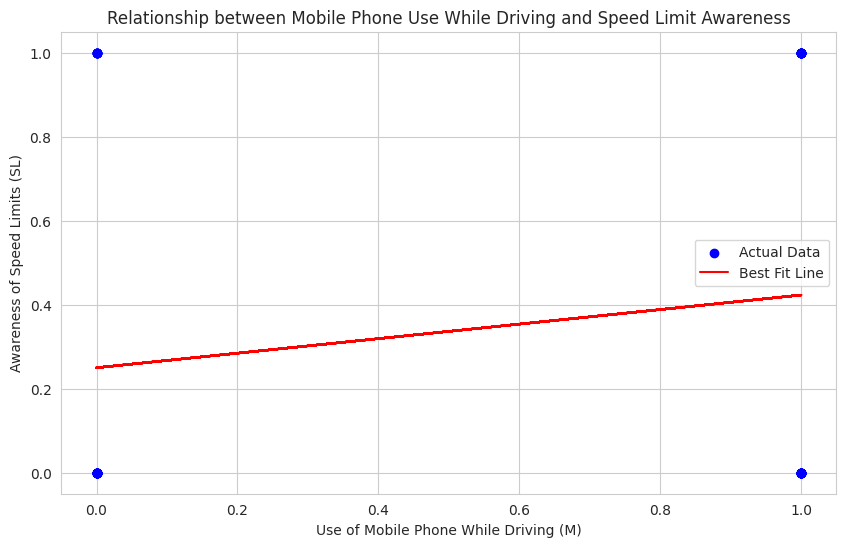

In [ ]:
# Since it's challenging to visualize a multiple regression model with many predictors in a 2D plot,
# we'll focus on visualizing the relationship between SL (Speed Limit Awareness) and a single predictor for demonstration.
# Given the significant positive coefficient for 'M' (Use of Mobile Phone While Driving) in the regression model,
# let's choose it for visualization.

# Predictor variable 'M'
X_M_transformed = data_encoded['M'].values.reshape(-1, 1)  # Reshape for sklearn

# Recreate the linear regression model for 'M' for visualization purposes
model_single_transformed = LinearRegression()
model_single_transformed.fit(X_M_transformed, y_transformed)

# Predictions for plotting the best fit line
y_pred_transformed = model_single_transformed.predict(X_M_transformed)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_M_transformed, y_transformed, color='blue', label='Actual Data')
plt.plot(X_M_transformed, y_pred_transformed, color='red', label='Best Fit Line')
plt.xlabel('Use of Mobile Phone While Driving (M)')
plt.ylabel('Awareness of Speed Limits (SL)')
plt.title('Relationship between Mobile Phone Use While Driving and Speed Limit Awareness')
plt.legend()



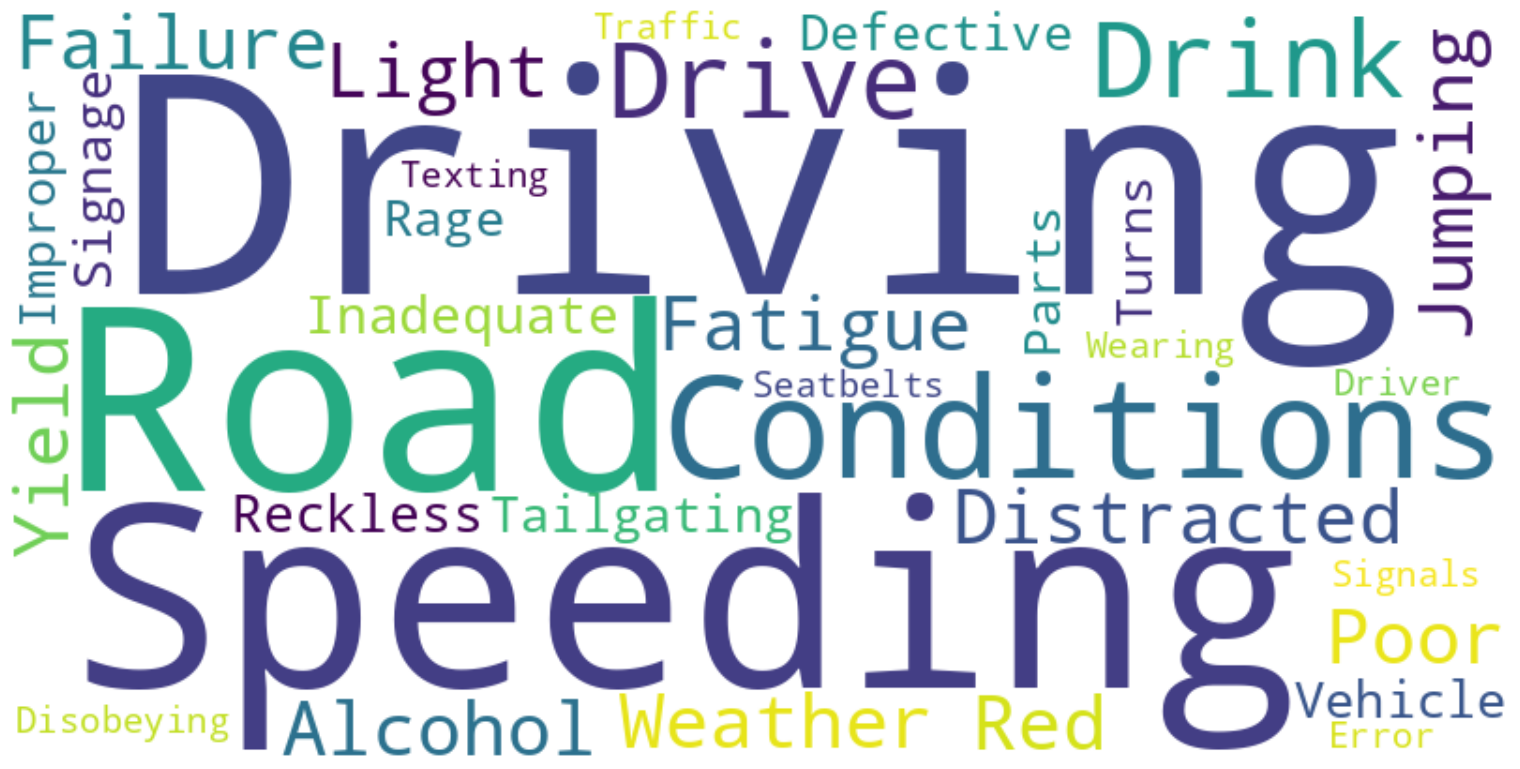

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of common causes of traffic accidents for the word cloud
common_causes = [
    'Drink and Drive', 'Over Speeding', 'Fatigue', 'Alcohol',
    'Red Light Jumping', 'Distracted Driving', 'Poor Road Conditions',
    'Weather Conditions', 'Failure to Yield', 'Inadequate Signage',
    'Speeding', 'Reckless Driving', 'Tailgating', 'Defective Vehicle Parts',
    'Improper Turns', 'Road Rage', 'Disobeying Traffic Signals',
    'Texting and Driving', 'Driver Error', 'Not Wearing Seatbelts'
]

text = ' '.join(common_causes)

# Create the word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', colormap='viridis').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [ ]:
pip install matplotlib numpy

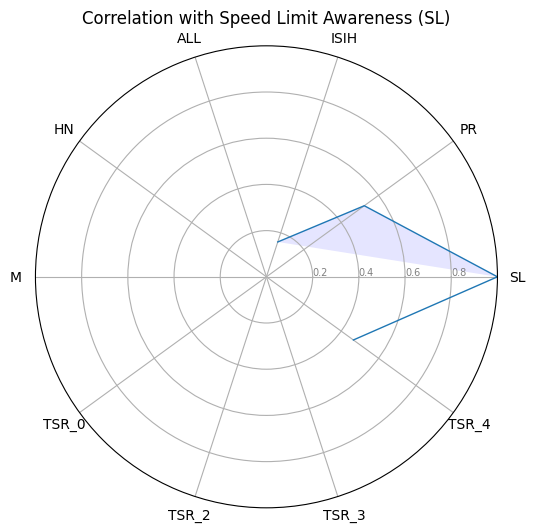

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Given 'correlation_matrix' is your DataFrame with correlation values.
# Extract the correlations relative to 'SL' (excluding the self-correlation at index 0)
categories = list(correlation_matrix.columns)
values = correlation_matrix.loc['SL'].tolist()
values += values[:1]  # Repeat the first value to close the circular graph.

# Number of variables we're plotting.
num_vars = len(categories)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0,1)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Correlation with Speed Limit Awareness (SL)')

plt.show()


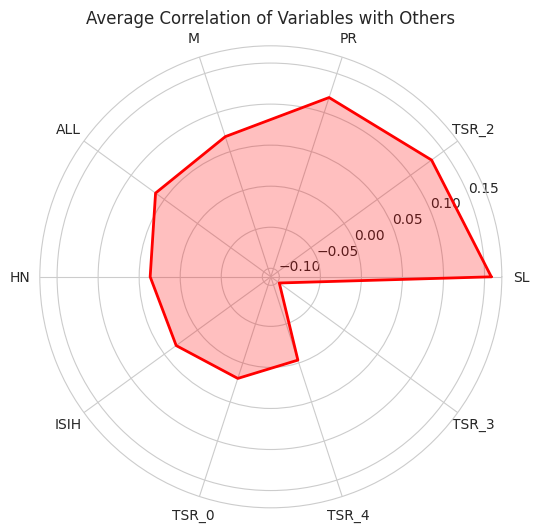

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'correlation_matrix' is your DataFrame containing the correlation values
# Calculate the average correlation for each variable
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Preparing data for the spider chart
labels = np.array(avg_correlation.index)
stats = avg_correlation.values

# Number of variables we're plotting
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart requires a closed loop:
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data:
ax.plot(angles, stats, color='red', linewidth=2)
# Fill it in:
ax.fill(angles, stats, color='red', alpha=0.25)

# Fix up the labels:
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.title('Average Correlation of Variables with Others')

plt.show()


In [23]:
pip install networkx matplotlib


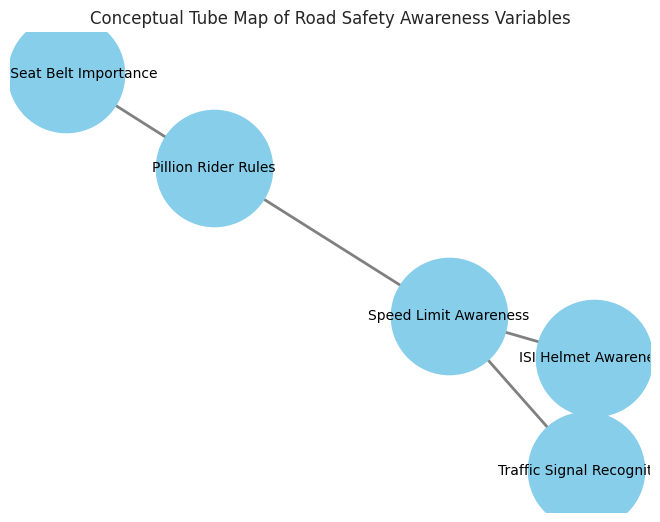

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes with the variable names (these could be your study variables)
variables = ['Speed Limit Awareness', 'Traffic Signal Recognition', 'Rear Seat Belt Importance', 'Pillion Rider Rules', 'ISI Helmet Awareness']
for var in variables:
    G.add_node(var)

# Define connections between nodes and the 'weight' of that connection
# (for simplicity, this example doesn't use actual data to define weights)
connections = [('Speed Limit Awareness', 'Traffic Signal Recognition', 1),
               ('Rear Seat Belt Importance', 'Pillion Rider Rules', 2),
               ('ISI Helmet Awareness', 'Speed Limit Awareness', 3),
               ('Traffic Signal Recognition', 'ISI Helmet Awareness', 2),
               ('Pillion Rider Rules', 'Speed Limit Awareness', 1)]

G.add_weighted_edges_from(connections)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=7000, node_color='skyblue', font_size=10, width=2, edge_color='gray')

plt.title('Conceptual Tube Map of Road Safety Awareness Variables')
plt.show()


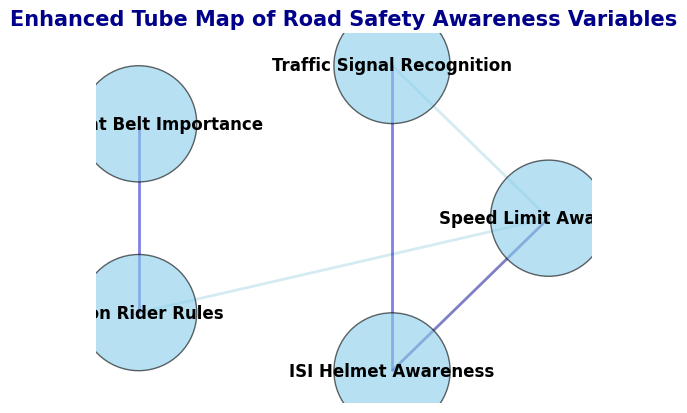

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes with the variable names (these could be your study variables)
variables = ['Speed Limit Awareness', 'Traffic Signal Recognition', 'Rear Seat Belt Importance', 'Pillion Rider Rules', 'ISI Helmet Awareness']
for var in variables:
    G.add_node(var)

# Define connections between nodes and the 'weight' of that connection
connections = [('Speed Limit Awareness', 'Traffic Signal Recognition', 1),
               ('Rear Seat Belt Importance', 'Pillion Rider Rules', 2),
               ('ISI Helmet Awareness', 'Speed Limit Awareness', 3),
               ('Traffic Signal Recognition', 'ISI Helmet Awareness', 2),
               ('Pillion Rider Rules', 'Speed Limit Awareness', 1)]

G.add_weighted_edges_from(connections)

# Customizing the graph layout for a more 'tube map' feel
pos = nx.circular_layout(G)  # This positions nodes in a circle, which may better represent a 'tube map' style

# Edge colors based on weight
edge_colors = ['lightblue' if G[u][v]['weight'] == 1 else 'mediumblue' if G[u][v]['weight'] == 2 else 'darkblue' for u, v in G.edges()]

# Node sizes can be adjusted here; you might want to make them proportional to some metric in your study
node_sizes = [7000 for _ in range(len(G))]  # Static size for simplicity, but can be dynamic

# Drawing nodes, edges, and labels with customizations
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6, edgecolors='black')  # Nodes with border
nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_colors, alpha=0.5)  # Edges with custom color based on 'weight'
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')  # Bold labels for better readability

plt.title('Enhanced Tube Map of Road Safety Awareness Variables', size=15, color='darkblue', fontweight='bold')
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()
